# Standardization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
# add target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [6]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

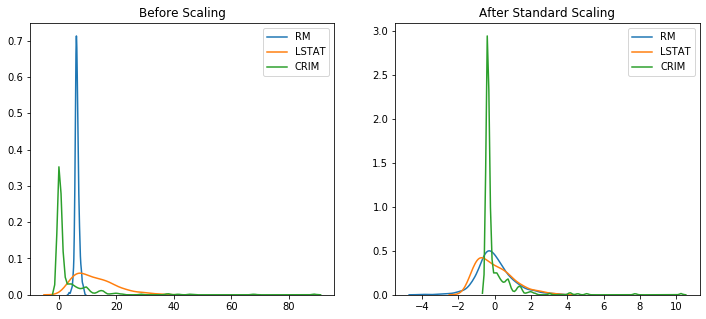

In [8]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

# MinMaxScaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

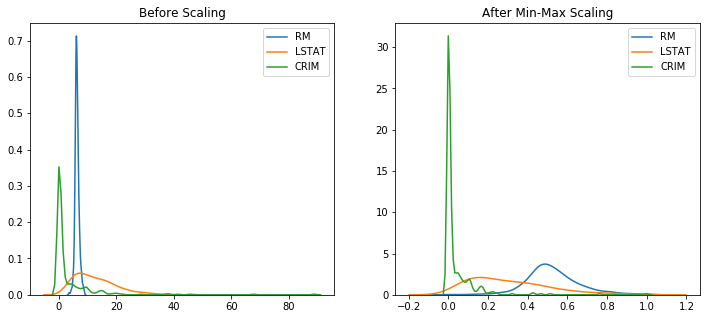

In [13]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

# Mean Normalisation

In [16]:
# let's first learn the mean from the train set

means = X_train.mean(axis=0)
means

CRIM         3.358284
ZN          11.809322
INDUS       11.078757
CHAS         0.064972
NOX          0.556098
RM           6.308427
AGE         68.994068
DIS          3.762459
RAD          9.353107
TAX        401.782486
PTRATIO     18.473446
B          360.601186
LSTAT       12.440650
dtype: float64

In [17]:
# let's now learn the min and max values, and the value range 
# from the train set

ranges = X_train.max(axis=0)-X_train.min(axis=0)
ranges

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.95230
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       35.25000
dtype: float64

In [18]:
# now we are ready to perform mean normalisation:

X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

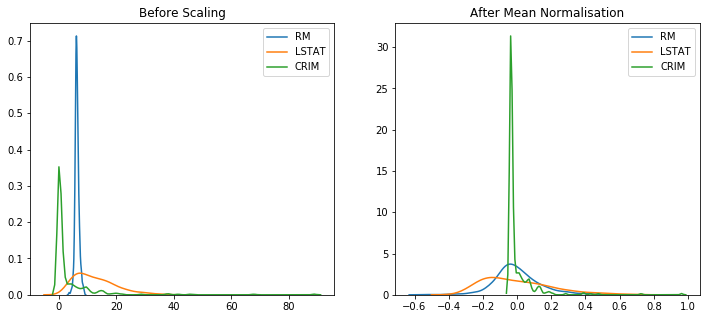

In [19]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

# Centering + MaxAbsScaling

In [20]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

In [21]:
# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the MaxAbsScaler normally
scaler_maxabs = MaxAbsScaler()

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)
scaler_maxabs.fit(X_train)

# transform train and test sets
X_train_scaled = scaler_maxabs.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_maxabs.transform(scaler_mean.transform(X_test))

In [22]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

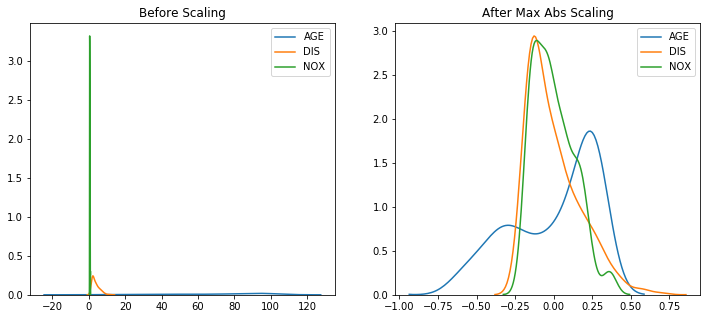

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

# RobustScaling

In [24]:
# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

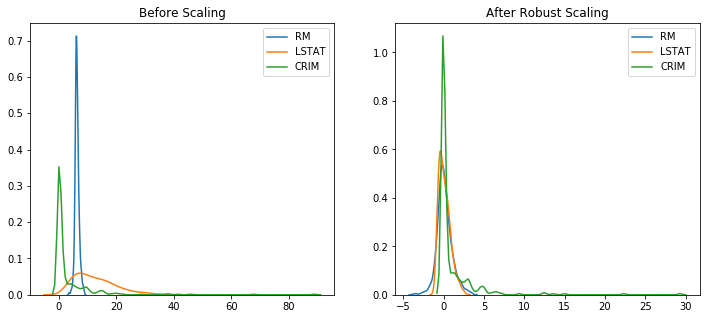

In [26]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()